In [287]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler


In [233]:
bike = pd.read_csv('day.csv')

In [234]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [235]:
bike.shape

(730, 16)

In [236]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [237]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data preparation and cleaning

### season column has 1,2,3,4 representing four seasons as it will be effecting our analysis as the numericals were in increasing order which by default thinks as the highest numerical season is superior to the least so to avoid this lets rename them to original

In [238]:
def rename(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
bike['season'] = bike['season'].apply(rename) 

In [239]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [240]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [241]:
bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [242]:
def obj_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike[['mnth']] = bike[['mnth']].apply(obj_map) 

In [243]:
bike['mnth'].value_counts()

Jan    62
Dec    62
Mar    62
Oct    62
Aug    62
Jul    62
May    62
Nov    60
Apr    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [245]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [246]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [248]:
def obj_map(x):
    return x.map({1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat',0:'sun'})

bike[['weekday']] = bike[['weekday']].apply(obj_map) 

In [249]:
def obj_map(x):
    return x.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

bike[['weathersit']] = bike[['weathersit']].apply(obj_map) 

In [251]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [253]:
#dropping unwanted records
bike = bike.drop(['instant','casual','registered','dteday'], axis=1)

In [254]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data visualisation on numerical columns

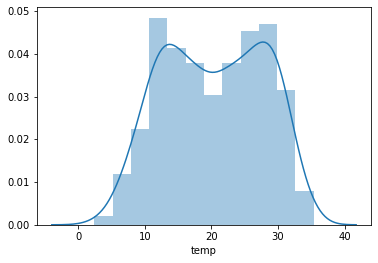

In [255]:
sns.distplot(bike['temp']);

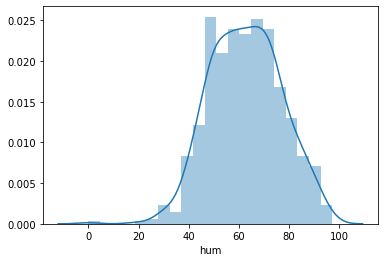

In [256]:
sns.distplot(bike['hum']);

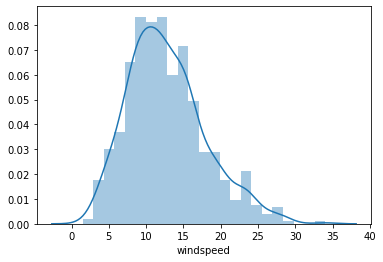

In [257]:
sns.distplot(bike['windspeed']);

In [258]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## visualising numerical variables

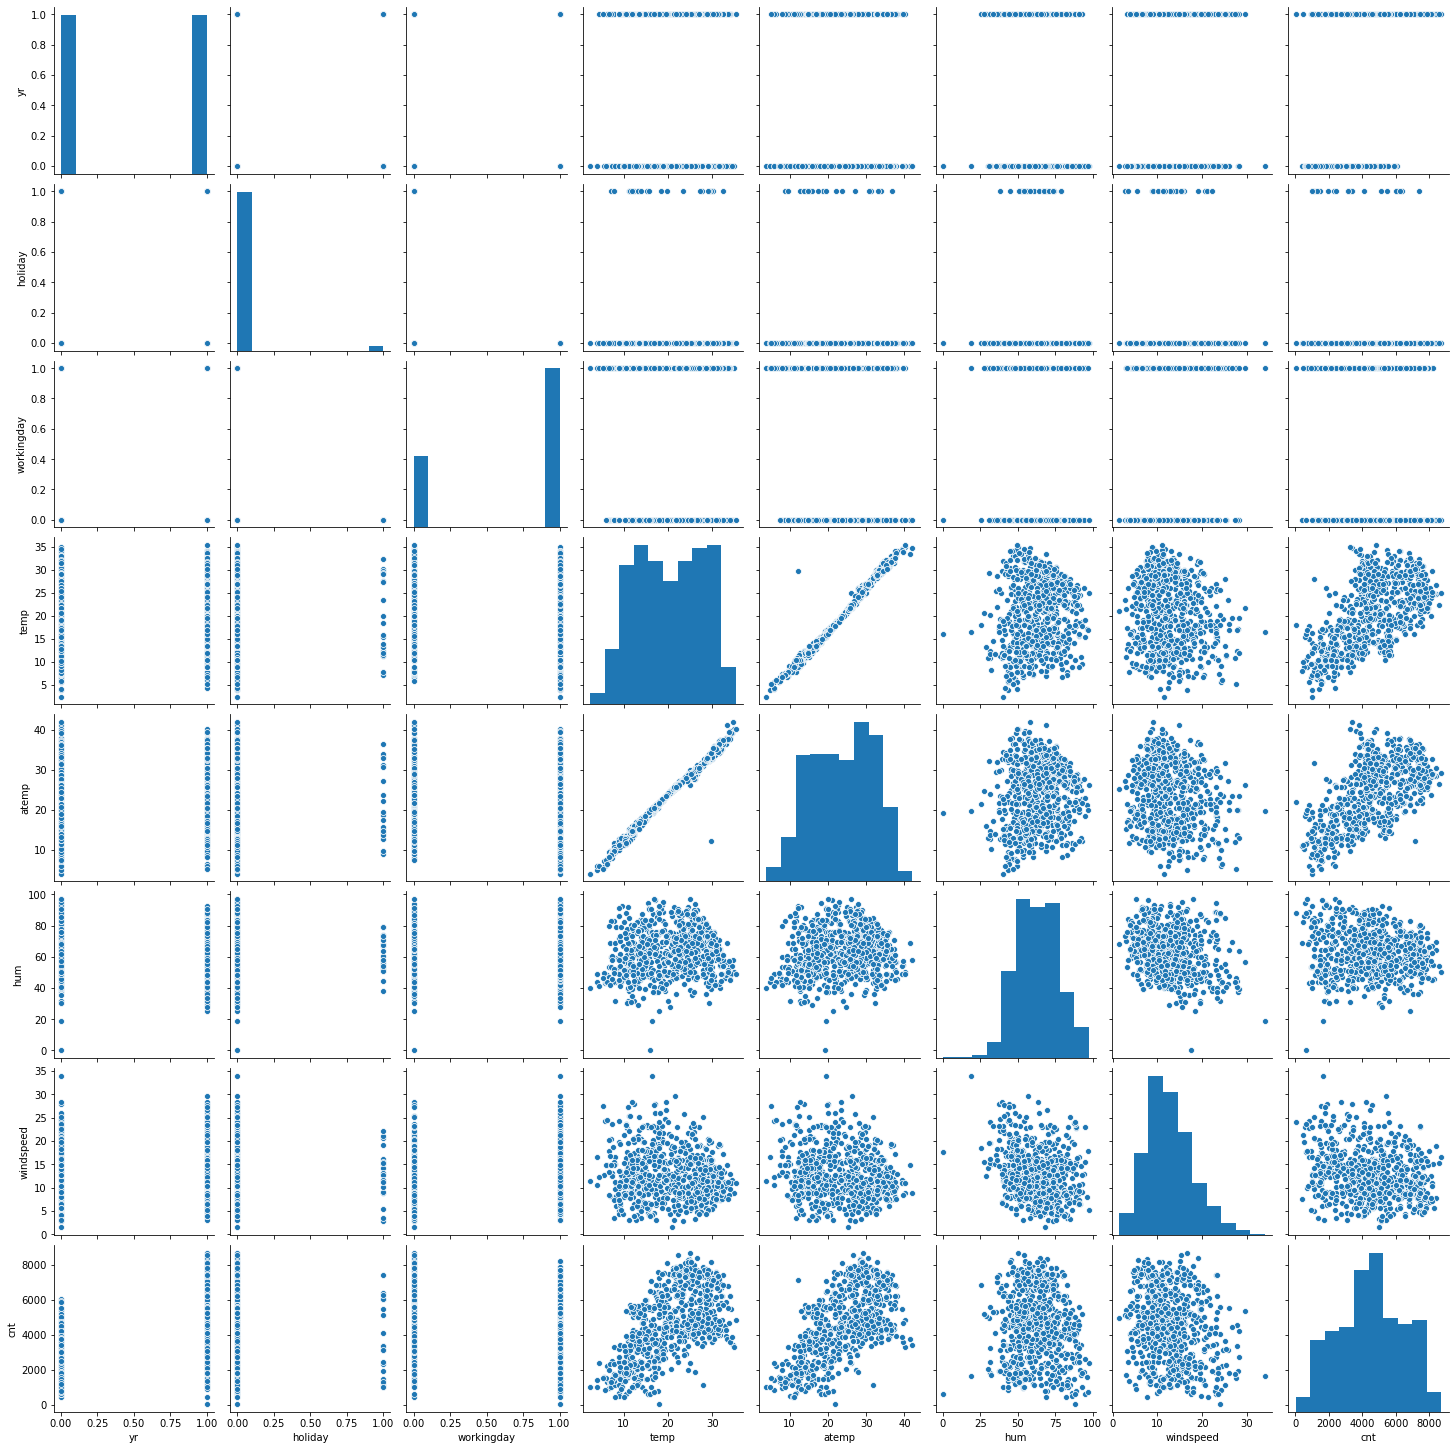

In [259]:
sns.pairplot(bike)
plt.show()

## visualising catagorical variables

In [260]:
bike_categorical = bike.select_dtypes(exclude=['float64','int64'])

In [261]:
bike_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

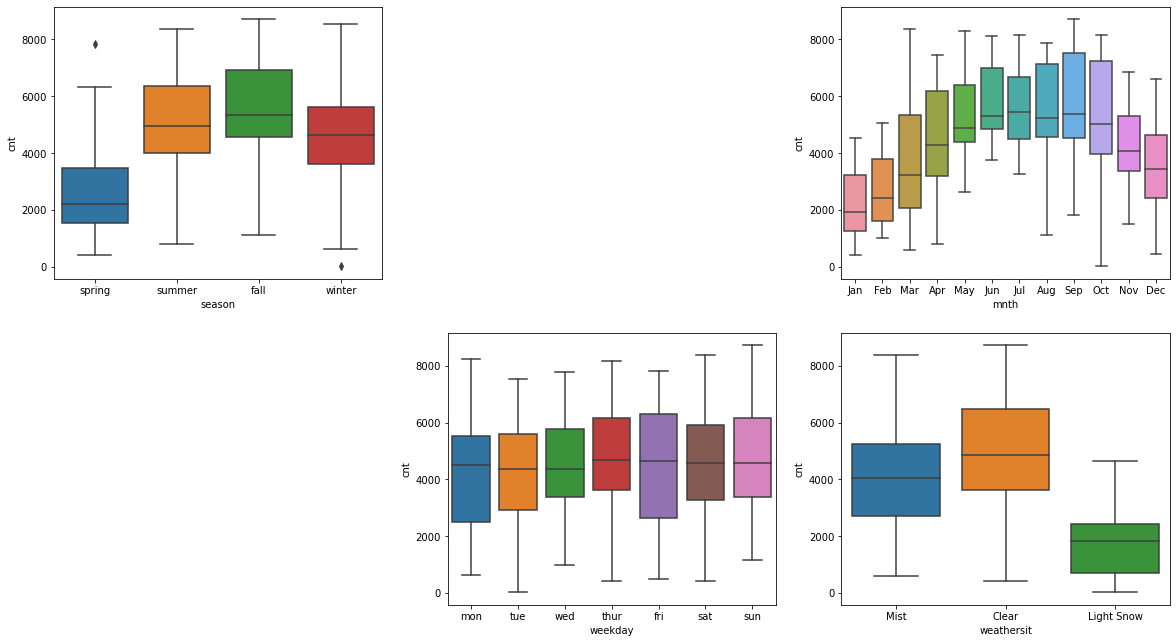

In [262]:
plt.figure(figsize=(20,11))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

In [263]:
bike.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [264]:
Float_var_list = ['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']

for var in Float_var_list:
    bike[var] = bike[var].astype('float')

In [265]:
# Numeric cols
bike_numeric = bike.select_dtypes(include=['float64'])
bike_numeric.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,1.0,14.110847,18.18125,80.5833,10.749882,985.0
1,0.0,0.0,1.0,14.902598,17.68695,69.6087,16.652113,801.0
2,0.0,0.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,0.0,0.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,0.0,0.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0


In [266]:
#correlation matrix
cor = bike_numeric.corr()
cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


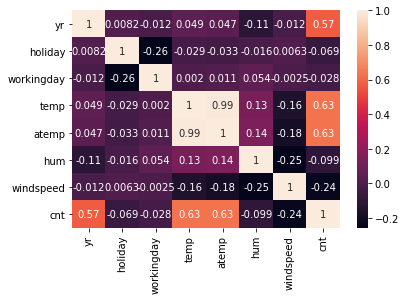

In [267]:
sns.heatmap(cor,annot = True)

# Preparing the data

In [268]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0.0,Jan,0.0,mon,1.0,Mist,14.110847,18.18125,80.5833,10.749882,985.0
1,spring,0.0,Jan,0.0,tue,1.0,Mist,14.902598,17.68695,69.6087,16.652113,801.0
2,spring,0.0,Jan,0.0,wed,1.0,Clear,8.050924,9.47025,43.7273,16.636703,1349.0
3,spring,0.0,Jan,0.0,thur,1.0,Clear,8.200000,10.60610,59.0435,10.739832,1562.0
4,spring,0.0,Jan,0.0,fri,1.0,Clear,9.305237,11.46350,43.6957,12.522300,1600.0


### creating dummies for the catagorical columns

In [269]:
bike_dummies = pd.get_dummies(bike_categorical,drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### creating a list of categorical variables

In [270]:
list(bike_categorical.columns)

['season', 'mnth', 'weekday', 'weathersit']

#### dropping the categorical variables using drop function as they wont be needed after creating dummies

In [271]:
bike = bike.drop(bike_categorical.columns,axis=1)
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

#### joining the dummies to the original data set using concat function

In [272]:
bike = pd.concat([bike,bike_dummies], axis=1)

In [273]:
bike.tail()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
725,1.0,0.0,1.0,10.420847,11.33210,65.2917,23.458911,2114.0,1,0,...,0,0,0,0,0,0,0,0,0,1
726,1.0,0.0,0.0,10.386653,12.75230,59.0000,10.416557,3095.0,1,0,...,0,0,0,1,0,0,0,0,0,1
727,1.0,0.0,0.0,10.386653,12.12000,75.2917,8.333661,1341.0,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,0.0,1.0,10.489153,11.58500,48.3333,23.500518,1796.0,1,0,...,0,0,1,0,0,0,0,0,0,0
729,1.0,0.0,1.0,8.849153,11.17435,57.7500,10.374682,2729.0,1,0,...,0,0,0,0,0,0,1,0,0,1


# scaling the data using minmax scalar

In [275]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=117)
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [276]:
#1. instantiate an object
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0.0,0.0,0.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [277]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


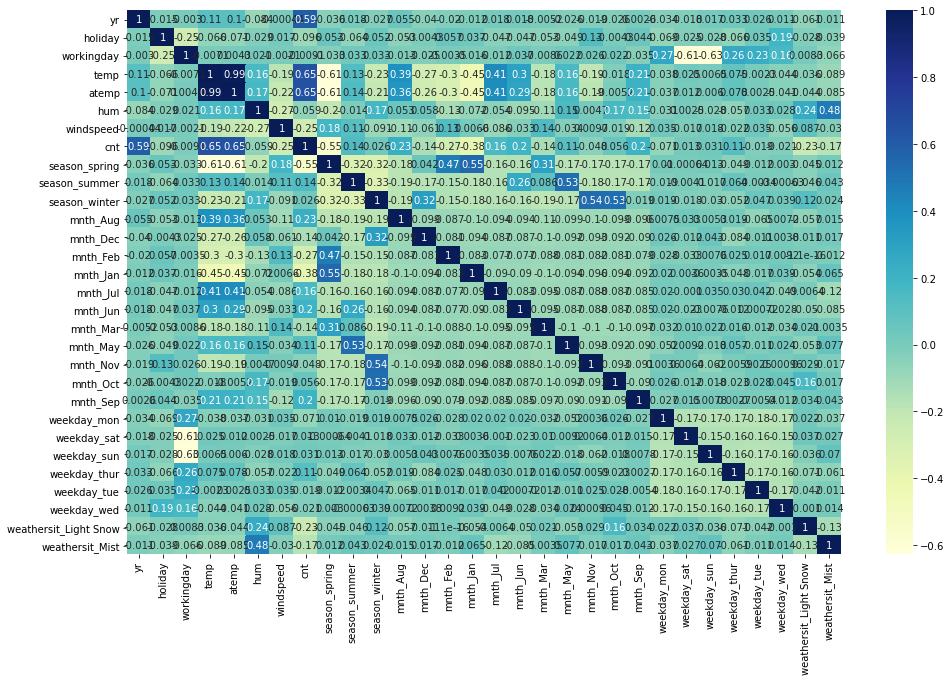

In [278]:
# heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

## splitting data to X_train, y_train

In [281]:

y_train = df_train.pop('cnt')
X_train = df_train

In [282]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [284]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [285]:
# buils a model with all the variable
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-177
Time:                        19:24:55   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3915      0.085      4.593      0.000       0.224       0.559
yr                        0.2312      0.008     28.360      0.000       0.215       0.247
holiday                  -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday               -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                      0.3873      0.143      2.699      0.007       0.105       0.669
atemp                     0.0547      0.139      0.392      0.695      -0.219       0.329
hum                      -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed                -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring            -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer             0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter             0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug                  0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec                 -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb                 -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan                 -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul                 -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun                  0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar                  0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May                  0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov                 -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct                  0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep                  0.0916      0.032      2.837      0.005       0.028       0.155
weekday_mon              -0.0247      0.015     -1.688      0.092      -0.053       0.004
weekday_sat              -0.0557      0.072     -0.777      0.438      -0.197       0.085
weekday_sun              -0.0499      0.072     -0.696      0.487      -0.191       0.091
weekday_thur              0.0042      0.015      0.280      0.780      -0.025       0.034
weekday_tue              -0.0261      0.015     -1.776      0.076      -0.055       0.003
weekday_wed              -0.0103      0.015     -0.670      0.503      -0.040       0.020
weathersit_Light Snow    -0.2492      0.027     -9.324      0.000      -0.302      -0.197
weathersit_Mist          -0.0578      0.011     -5.486      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.

In [288]:
# checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,441.52
4,atemp,382.19
2,workingday,63.90
5,hum,41.23
7,season_spring,13.52
9,season_winter,12.43
23,weekday_sun,12.35
22,weekday_sat,11.84
8,season_summer,9.88
18,mnth_Nov,7.16


## dropping variables with high p values

In [299]:
X = X_train.drop('mnth_Mar',axis=1)

In [300]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-178
Time:                        19:45:44   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3921      0.084      4.684      0.000       0.228       0.557
yr                        0.2312      0.008     28.389      0.000       0.215       0.247
holiday                  -0.1345      0.065     -2.056      0.040      -0.263      -0.006
workingday               -0.0605      0.071     -0.850      0.396      -0.200       0.079
temp                      0.3871      0.143      2.702      0.007       0.106       0.669
atemp                     0.0545      0.139      0.392      0.695      -0.219       0.328
hum                      -0.1577      0.039     -4.064      0.000      -0.234      -0.081
windspeed                -0.1803      0.027     -6.769      0.000      -0.233      -0.128
season_spring            -0.0405      0.029     -1.413      0.158      -0.097       0.016
season_summer             0.0456      0.026      1.759      0.079      -0.005       0.097
season_winter             0.1123      0.028      4.052      0.000       0.058       0.167
mnth_Aug                  0.0286      0.032      0.886      0.376      -0.035       0.092
mnth_Dec                 -0.0453      0.026     -1.725      0.085      -0.097       0.006
mnth_Feb                 -0.0383      0.023     -1.702      0.089      -0.083       0.006
mnth_Jan                 -0.0651      0.023     -2.882      0.004      -0.109      -0.021
mnth_Jul                 -0.0278      0.034     -0.824      0.410      -0.094       0.038
mnth_Jun                  0.0094      0.024      0.392      0.695      -0.038       0.056
mnth_May                  0.0252      0.020      1.264      0.207      -0.014       0.064
mnth_Nov                 -0.0404      0.031     -1.297      0.195      -0.101       0.021
mnth_Oct                  0.0050      0.031      0.161      0.872      -0.056       0.066
mnth_Sep                  0.0910      0.029      3.106      0.002       0.033       0.149
weekday_mon              -0.0247      0.015     -1.694      0.091      -0.053       0.004
weekday_sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
weekday_sun              -0.0499      0.072     -0.696      0.487      -0.191       0.091
weekday_thur              0.0042      0.015      0.281      0.779      -0.025       0.034
weekday_tue              -0.0261      0.015     -1.780      0.076      -0.055       0.003
weekday_wed              -0.0103      0.015     -0.672      0.502      -0.040       0.020
weathersit_Light Snow    -0.2492      0.027     -9.334      0.000      -0.302      -0.197
weathersit_Mist          -0.0578      0.011     -5.493      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.698   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarqu

In [301]:
# checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,441.52
4,atemp,382.19
2,workingday,63.90
5,hum,41.23
7,season_spring,13.52
9,season_winter,12.43
23,weekday_sun,12.35
22,weekday_sat,11.84
8,season_summer,9.88
18,mnth_Nov,7.16


In [305]:
X = X_train.drop(['mnth_Mar','mnth_Oct'],axis=1)

In [306]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-179
Time:                        19:48:44   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     482   BIC:                            -871.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3936      0.083      4.736      0.000       0.230       0.557
yr                        0.2312      0.008     28.442      0.000       0.215       0.247
holiday                  -0.1345      0.065     -2.057      0.040      -0.263      -0.006
workingday               -0.0608      0.071     -0.855      0.393      -0.200       0.079
temp                      0.3875      0.143      2.708      0.007       0.106       0.669
atemp                     0.0546      0.139      0.393      0.695      -0.219       0.328
hum                      -0.1571      0.039     -4.072      0.000      -0.233      -0.081
windspeed                -0.1801      0.027     -6.774      0.000      -0.232      -0.128
season_spring            -0.0414      0.028     -1.478      0.140      -0.096       0.014
season_summer             0.0440      0.024      1.839      0.067      -0.003       0.091
season_winter             0.1144      0.024      4.672      0.000       0.066       0.163
mnth_Aug                  0.0266      0.030      0.894      0.372      -0.032       0.085
mnth_Dec                 -0.0483      0.019     -2.594      0.010      -0.085      -0.012
mnth_Feb                 -0.0391      0.022     -1.785      0.075      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.990      0.003      -0.109      -0.023
mnth_Jul                 -0.0298      0.031     -0.952      0.341      -0.091       0.032
mnth_Jun                  0.0084      0.023      0.364      0.716      -0.037       0.054
mnth_May                  0.0249      0.020      1.255      0.210      -0.014       0.064
mnth_Nov                 -0.0443      0.019     -2.294      0.022      -0.082      -0.006
mnth_Sep                  0.0886      0.025      3.542      0.000       0.039       0.138
weekday_mon              -0.0246      0.015     -1.689      0.092      -0.053       0.004
weekday_sat              -0.0559      0.072     -0.781      0.435      -0.197       0.085
weekday_sun              -0.0501      0.072     -0.701      0.484      -0.191       0.090
weekday_thur              0.0042      0.015      0.282      0.778      -0.025       0.034
weekday_tue              -0.0261      0.015     -1.781      0.075      -0.055       0.003
weekday_wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
weathersit_Light Snow    -0.2491      0.027     -9.342      0.000      -0.302      -0.197
weathersit_Mist          -0.0579      0.011     -5.505      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.141   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.276
Skew:                          -0.764   Prob(JB):       

In [307]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,441.52
4,atemp,382.19
2,workingday,63.90
5,hum,41.23
7,season_spring,13.52
9,season_winter,12.43
23,weekday_sun,12.35
22,weekday_sat,11.84
8,season_summer,9.88
18,mnth_Nov,7.16


In [308]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur'],axis=1)

In [309]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-180
Time:                        19:50:04   Log-Likelihood:                 523.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3957      0.083      4.785      0.000       0.233       0.558
yr                        0.2312      0.008     28.487      0.000       0.215       0.247
holiday                  -0.1345      0.065     -2.059      0.040      -0.263      -0.006
workingday               -0.0606      0.071     -0.853      0.394      -0.200       0.079
temp                      0.3875      0.143      2.710      0.007       0.107       0.668
atemp                     0.0548      0.139      0.394      0.694      -0.218       0.328
hum                      -0.1575      0.039     -4.087      0.000      -0.233      -0.082
windspeed                -0.1803      0.027     -6.786      0.000      -0.232      -0.128
season_spring            -0.0416      0.028     -1.485      0.138      -0.097       0.013
season_summer             0.0442      0.024      1.848      0.065      -0.003       0.091
season_winter             0.1145      0.024      4.683      0.000       0.066       0.163
mnth_Aug                  0.0266      0.030      0.894      0.372      -0.032       0.085
mnth_Dec                 -0.0486      0.019     -2.617      0.009      -0.085      -0.012
mnth_Feb                 -0.0389      0.022     -1.778      0.076      -0.082       0.004
mnth_Jan                 -0.0658      0.022     -2.992      0.003      -0.109      -0.023
mnth_Jul                 -0.0296      0.031     -0.947      0.344      -0.091       0.032
mnth_Jun                  0.0081      0.023      0.350      0.727      -0.037       0.054
mnth_May                  0.0249      0.020      1.255      0.210      -0.014       0.064
mnth_Nov                 -0.0445      0.019     -2.307      0.021      -0.082      -0.007
mnth_Sep                  0.0885      0.025      3.544      0.000       0.039       0.138
weekday_mon              -0.0266      0.013     -2.121      0.034      -0.051      -0.002
weekday_sat              -0.0578      0.071     -0.812      0.417      -0.198       0.082
weekday_sun              -0.0520      0.071     -0.731      0.465      -0.192       0.088
weekday_tue              -0.0282      0.013     -2.235      0.026      -0.053      -0.003
weekday_wed              -0.0123      0.013     -0.919      0.359      -0.039       0.014
weathersit_Light Snow    -0.2498      0.027     -9.418      0.000      -0.302      -0.198
weathersit_Mist          -0.0579      0.010     -5.520      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.453   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.587
Skew:                          -0.766   Prob(JB):                     1.38e-45
Kurtosis:                       5.716   Cond. No.                  

In [310]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun'],axis=1)

In [311]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.25e-181
Time:                        19:51:28   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3953      0.083      4.785      0.000       0.233       0.558
yr                        0.2310      0.008     28.595      0.000       0.215       0.247
holiday                  -0.1344      0.065     -2.059      0.040      -0.263      -0.006
workingday               -0.0596      0.071     -0.841      0.401      -0.199       0.080
temp                      0.4025      0.136      2.954      0.003       0.135       0.670
atemp                     0.0481      0.138      0.350      0.727      -0.222       0.318
hum                      -0.1593      0.038     -4.173      0.000      -0.234      -0.084
windspeed                -0.1815      0.026     -6.903      0.000      -0.233      -0.130
season_spring            -0.0442      0.027     -1.638      0.102      -0.097       0.009
season_summer             0.0429      0.024      1.817      0.070      -0.003       0.089
season_winter             0.1117      0.023      4.852      0.000       0.066       0.157
mnth_Aug                  0.0204      0.024      0.854      0.394      -0.027       0.067
mnth_Dec                 -0.0477      0.018     -2.596      0.010      -0.084      -0.012
mnth_Feb                 -0.0378      0.022     -1.747      0.081      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -2.990      0.003      -0.106      -0.022
mnth_Jul                 -0.0363      0.025     -1.458      0.146      -0.085       0.013
mnth_May                  0.0216      0.017      1.236      0.217      -0.013       0.056
mnth_Nov                 -0.0439      0.019     -2.289      0.023      -0.082      -0.006
mnth_Sep                  0.0841      0.022      3.891      0.000       0.042       0.127
weekday_mon              -0.0263      0.013     -2.105      0.036      -0.051      -0.002
weekday_sat              -0.0569      0.071     -0.800      0.424      -0.197       0.083
weekday_sun              -0.0510      0.071     -0.718      0.473      -0.190       0.089
weekday_tue              -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_wed              -0.0122      0.013     -0.910      0.363      -0.038       0.014
weathersit_Light Snow    -0.2498      0.027     -9.425      0.000      -0.302      -0.198
weathersit_Mist          -0.0577      0.010     -5.514      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.822   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.187
Skew:                          -0.765   Prob(JB):                     1.25e-44
Kurtosis:                       5.679   Cond. No.                         89.4
==============================================================================

In [312]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp'],axis=1)

In [313]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.22e-182
Time:                        19:52:36   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3950      0.083      4.786      0.000       0.233       0.557
yr                        0.2309      0.008     28.619      0.000       0.215       0.247
holiday                  -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday               -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp                      0.4482      0.039     11.556      0.000       0.372       0.524
hum                      -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed                -0.1833      0.026     -7.121      0.000      -0.234      -0.133
season_spring            -0.0434      0.027     -1.618      0.106      -0.096       0.009
season_summer             0.0436      0.023      1.859      0.064      -0.002       0.090
season_winter             0.1125      0.023      4.917      0.000       0.068       0.157
mnth_Aug                  0.0198      0.024      0.830      0.407      -0.027       0.067
mnth_Dec                 -0.0476      0.018     -2.595      0.010      -0.084      -0.012
mnth_Feb                 -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan                 -0.0644      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul                 -0.0363      0.025     -1.459      0.145      -0.085       0.013
mnth_May                  0.0214      0.017      1.225      0.221      -0.013       0.056
mnth_Nov                 -0.0439      0.019     -2.288      0.023      -0.082      -0.006
mnth_Sep                  0.0842      0.022      3.896      0.000       0.042       0.127
weekday_mon              -0.0263      0.013     -2.107      0.036      -0.051      -0.002
weekday_sat              -0.0570      0.071     -0.803      0.422      -0.197       0.083
weekday_sun              -0.0508      0.071     -0.716      0.474      -0.190       0.089
weekday_tue              -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_wed              -0.0122      0.013     -0.911      0.363      -0.038       0.014
weathersit_Light Snow    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
weathersit_Mist          -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [315]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,54.55
4,hum,39.11
3,temp,29.71
19,weekday_sun,10.82
18,weekday_sat,10.44
6,season_spring,10.24
7,season_summer,8.04
8,season_winter,7.81
5,windspeed,5.50
9,mnth_Aug,3.44


In [316]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun'],axis=1)

In [317]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.42e-183
Time:                        19:55:39   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3436      0.041      8.442      0.000       0.264       0.424
yr                        0.2313      0.008     28.724      0.000       0.215       0.247
holiday                  -0.0926      0.029     -3.247      0.001      -0.149      -0.037
workingday               -0.0095      0.013     -0.732      0.465      -0.035       0.016
temp                      0.4490      0.039     11.588      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed                -0.1838      0.026     -7.147      0.000      -0.234      -0.133
season_spring            -0.0431      0.027     -1.608      0.109      -0.096       0.010
season_summer             0.0437      0.023      1.863      0.063      -0.002       0.090
season_winter             0.1123      0.023      4.910      0.000       0.067       0.157
mnth_Aug                  0.0194      0.024      0.816      0.415      -0.027       0.066
mnth_Dec                 -0.0474      0.018     -2.584      0.010      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.736      0.083      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.995      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.476      0.141      -0.085       0.012
mnth_May                  0.0211      0.017      1.209      0.227      -0.013       0.055
mnth_Nov                 -0.0451      0.019     -2.364      0.018      -0.083      -0.008
mnth_Sep                  0.0843      0.022      3.904      0.000       0.042       0.127
weekday_mon              -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_sat              -0.0074      0.015     -0.483      0.629      -0.037       0.023
weekday_tue              -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_wed              -0.0109      0.013     -0.824      0.411      -0.037       0.015
weathersit_Light Snow    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
weathersit_Mist          -0.0578      0.010     -5.529      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat'],axis=1)

In [319]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.41e-184
Time:                        19:56:56   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3403      0.040      8.486      0.000       0.262       0.419
yr                        0.2314      0.008     28.774      0.000       0.216       0.247
holiday                  -0.0895      0.028     -3.223      0.001      -0.144      -0.035
workingday               -0.0059      0.011     -0.556      0.579      -0.027       0.015
temp                      0.4486      0.039     11.590      0.000       0.373       0.525
hum                      -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed                -0.1835      0.026     -7.143      0.000      -0.234      -0.133
season_spring            -0.0436      0.027     -1.626      0.105      -0.096       0.009
season_summer             0.0434      0.023      1.852      0.065      -0.003       0.089
season_winter             0.1120      0.023      4.905      0.000       0.067       0.157
mnth_Aug                  0.0191      0.024      0.803      0.422      -0.028       0.066
mnth_Dec                 -0.0472      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb                 -0.0372      0.022     -1.726      0.085      -0.080       0.005
mnth_Jan                 -0.0641      0.021     -2.998      0.003      -0.106      -0.022
mnth_Jul                 -0.0367      0.025     -1.477      0.140      -0.085       0.012
mnth_May                  0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov                 -0.0456      0.019     -2.397      0.017      -0.083      -0.008
mnth_Sep                  0.0841      0.022      3.899      0.000       0.042       0.126
weekday_mon              -0.0258      0.012     -2.069      0.039      -0.050      -0.001
weekday_tue              -0.0273      0.013     -2.174      0.030      -0.052      -0.003
weekday_wed              -0.0108      0.013     -0.819      0.413      -0.037       0.015
weathersit_Light Snow    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
weathersit_Mist          -0.0577      0.010     -5.524      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday'],axis=1)

In [321]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.41e-185
Time:                        19:57:54   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3374      0.040      8.492      0.000       0.259       0.415
yr                        0.2314      0.008     28.798      0.000       0.216       0.247
holiday                  -0.0841      0.026     -3.237      0.001      -0.135      -0.033
temp                      0.4486      0.039     11.597      0.000       0.373       0.525
hum                      -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed                -0.1835      0.026     -7.148      0.000      -0.234      -0.133
season_spring            -0.0432      0.027     -1.615      0.107      -0.096       0.009
season_summer             0.0436      0.023      1.861      0.063      -0.002       0.090
season_winter             0.1124      0.023      4.927      0.000       0.068       0.157
mnth_Aug                  0.0195      0.024      0.821      0.412      -0.027       0.066
mnth_Dec                 -0.0470      0.018     -2.569      0.011      -0.083      -0.011
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0360      0.025     -1.453      0.147      -0.085       0.013
mnth_May                  0.0209      0.017      1.202      0.230      -0.013       0.055
mnth_Nov                 -0.0462      0.019     -2.433      0.015      -0.084      -0.009
mnth_Sep                  0.0844      0.022      3.916      0.000       0.042       0.127
weekday_mon              -0.0286      0.011     -2.513      0.012      -0.051      -0.006
weekday_tue              -0.0300      0.012     -2.609      0.009      -0.053      -0.007
weekday_wed              -0.0136      0.012     -1.107      0.269      -0.038       0.010
weathersit_Light Snow    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
weathersit_Mist          -0.0571      0.010     -5.500      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug'],axis=1)

In [323]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.66e-186
Time:                        19:59:10   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3483      0.037      9.299      0.000       0.275       0.422
yr                        0.2316      0.008     28.843      0.000       0.216       0.247
holiday                  -0.0847      0.026     -3.260      0.001      -0.136      -0.034
temp                      0.4510      0.039     11.695      0.000       0.375       0.527
hum                      -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed                -0.1837      0.026     -7.157      0.000      -0.234      -0.133
season_spring            -0.0557      0.022     -2.523      0.012      -0.099      -0.012
season_summer             0.0304      0.017      1.784      0.075      -0.003       0.064
season_winter             0.1009      0.018      5.614      0.000       0.066       0.136
mnth_Dec                 -0.0480      0.018     -2.627      0.009      -0.084      -0.012
mnth_Feb                 -0.0375      0.022     -1.742      0.082      -0.080       0.005
mnth_Jan                 -0.0642      0.021     -3.001      0.003      -0.106      -0.022
mnth_Jul                 -0.0499      0.018     -2.751      0.006      -0.085      -0.014
mnth_May                  0.0205      0.017      1.177      0.240      -0.014       0.055
mnth_Nov                 -0.0475      0.019     -2.506      0.013      -0.085      -0.010
mnth_Sep                  0.0733      0.017      4.371      0.000       0.040       0.106
weekday_mon              -0.0283      0.011     -2.489      0.013      -0.051      -0.006
weekday_tue              -0.0302      0.012     -2.624      0.009      -0.053      -0.008
weekday_wed              -0.0133      0.012     -1.090      0.276      -0.037       0.011
weathersit_Light Snow    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
weathersit_Mist          -0.0568      0.010     -5.474      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.04
2,temp,18.41
5,season_spring,5.45
4,windspeed,4.87
7,season_winter,4.10
6,season_summer,3.35
10,mnth_Jan,2.38
19,weathersit_Mist,2.34
0,yr,2.11
9,mnth_Feb,1.92


In [325]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed'],axis=1)

In [326]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.45e-187
Time:                        20:02:11   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3449      0.037      9.238      0.000       0.272       0.418
yr                        0.2314      0.008     28.820      0.000       0.216       0.247
holiday                  -0.0902      0.025     -3.540      0.000      -0.140      -0.040
temp                      0.4530      0.039     11.758      0.000       0.377       0.529
hum                      -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed                -0.1827      0.026     -7.120      0.000      -0.233      -0.132
season_spring            -0.0548      0.022     -2.484      0.013      -0.098      -0.011
season_summer             0.0307      0.017      1.800      0.072      -0.003       0.064
season_winter             0.1004      0.018      5.589      0.000       0.065       0.136
mnth_Dec                 -0.0472      0.018     -2.588      0.010      -0.083      -0.011
mnth_Feb                 -0.0377      0.022     -1.749      0.081      -0.080       0.005
mnth_Jan                 -0.0646      0.021     -3.021      0.003      -0.107      -0.023
mnth_Jul                 -0.0497      0.018     -2.741      0.006      -0.085      -0.014
mnth_May                  0.0201      0.017      1.153      0.249      -0.014       0.054
mnth_Nov                 -0.0461      0.019     -2.442      0.015      -0.083      -0.009
mnth_Sep                  0.0739      0.017      4.412      0.000       0.041       0.107
weekday_mon              -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_tue              -0.0275      0.011     -2.446      0.015      -0.050      -0.005
weathersit_Light Snow    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
weathersit_Mist          -0.0566      0.010     -5.454      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed','mnth_May'],axis=1)

In [328]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.77e-188
Time:                        20:03:02   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3360      0.037      9.195      0.000       0.264       0.408
yr                        0.2309      0.008     28.790      0.000       0.215       0.247
holiday                  -0.0909      0.025     -3.570      0.000      -0.141      -0.041
temp                      0.4607      0.038     12.142      0.000       0.386       0.535
hum                      -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed                -0.1841      0.026     -7.182      0.000      -0.234      -0.134
season_spring            -0.0515      0.022     -2.353      0.019      -0.094      -0.008
season_summer             0.0393      0.015      2.562      0.011       0.009       0.069
season_winter             0.1022      0.018      5.711      0.000       0.067       0.137
mnth_Dec                 -0.0461      0.018     -2.527      0.012      -0.082      -0.010
mnth_Feb                 -0.0365      0.022     -1.694      0.091      -0.079       0.006
mnth_Jan                 -0.0631      0.021     -2.957      0.003      -0.105      -0.021
mnth_Jul                 -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Nov                 -0.0447      0.019     -2.369      0.018      -0.082      -0.008
mnth_Sep                  0.0739      0.017      4.410      0.000       0.041       0.107
weekday_mon              -0.0264      0.011     -2.367      0.018      -0.048      -0.004
weekday_tue              -0.0278      0.011     -2.477      0.014      -0.050      -0.006
weathersit_Light Snow    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
weathersit_Mist          -0.0568      0.010     -5.471      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.80
2,temp,18.36
5,season_spring,5.45
4,windspeed,4.78
7,season_winter,4.08
6,season_summer,2.82
10,mnth_Jan,2.38
17,weathersit_Mist,2.34
0,yr,2.10
9,mnth_Feb,1.92


In [330]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed','mnth_May','hum'],axis=1)

In [331]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.68e-186
Time:                        20:05:36   Log-Likelihood:                 512.22
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     492   BIC:                            -912.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2670      0.033      8.122      0.000       0.202       0.332
yr                        0.2348      0.008     29.031      0.000       0.219       0.251
holiday                  -0.0912      0.026     -3.525      0.000      -0.142      -0.040
temp                      0.4192      0.037     11.294      0.000       0.346       0.492
windspeed                -0.1554      0.025     -6.208      0.000      -0.205      -0.106
season_spring            -0.0599      0.022     -2.709      0.007      -0.103      -0.016
season_summer             0.0322      0.015      2.080      0.038       0.002       0.063
season_winter             0.0884      0.018      4.950      0.000       0.053       0.123
mnth_Dec                 -0.0539      0.018     -2.926      0.004      -0.090      -0.018
mnth_Feb                 -0.0393      0.022     -1.799      0.073      -0.082       0.004
mnth_Jan                 -0.0709      0.022     -3.283      0.001      -0.113      -0.028
mnth_Jul                 -0.0446      0.018     -2.431      0.015      -0.081      -0.009
mnth_Nov                 -0.0459      0.019     -2.398      0.017      -0.084      -0.008
mnth_Sep                  0.0676      0.017      3.986      0.000       0.034       0.101
weekday_mon              -0.0269      0.011     -2.378      0.018      -0.049      -0.005
weekday_tue              -0.0315      0.011     -2.770      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2960      0.024    -12.129      0.000      -0.344      -0.248
weathersit_Mist          -0.0811      0.009     -9.416      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       75.247   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.139
Skew:                          -0.748   Prob(JB):                     3.12e-42
Kurtosis:                       5.600   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.28
3,windspeed,4.71
4,season_spring,4.35
6,season_winter,3.04
5,season_summer,2.26
9,mnth_Jan,2.21
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.83
10,mnth_Jul,1.61


In [353]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed','mnth_May','hum','mnth_Feb'],axis=1)

In [354]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.68e-186
Time:                        20:27:25   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2530      0.032      7.904      0.000       0.190       0.316
yr                        0.2344      0.008     28.932      0.000       0.219       0.250
holiday                  -0.0938      0.026     -3.622      0.000      -0.145      -0.043
temp                      0.4362      0.036     12.127      0.000       0.366       0.507
windspeed                -0.1536      0.025     -6.130      0.000      -0.203      -0.104
season_spring            -0.0708      0.021     -3.321      0.001      -0.113      -0.029
season_summer             0.0357      0.015      2.325      0.020       0.006       0.066
season_winter             0.0901      0.018      5.043      0.000       0.055       0.125
mnth_Dec                 -0.0438      0.018     -2.492      0.013      -0.078      -0.009
mnth_Jan                 -0.0499      0.018     -2.741      0.006      -0.086      -0.014
mnth_Jul                 -0.0456      0.018     -2.481      0.013      -0.082      -0.010
mnth_Nov                 -0.0406      0.019     -2.141      0.033      -0.078      -0.003
mnth_Sep                  0.0692      0.017      4.077      0.000       0.036       0.103
weekday_mon              -0.0263      0.011     -2.316      0.021      -0.049      -0.004
weekday_tue              -0.0317      0.011     -2.785      0.006      -0.054      -0.009
weathersit_Light Snow    -0.2951      0.024    -12.067      0.000      -0.343      -0.247
weathersit_Mist          -0.0811      0.009     -9.397      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.70
6,season_winter,3.00
4,season_spring,2.92
5,season_summer,2.26
0,yr,2.08
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.60
15,weathersit_Mist,1.57


In [358]:
X = X_train.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed','mnth_May','hum','mnth_Feb','windspeed'],axis=1)

In [359]:
X_train_sm = sm.add_constant(X)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.88e-179
Time:                        20:28:03   Log-Likelihood:                 491.82
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     494   BIC:                            -883.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1946      0.032      6.145      0.000       0.132       0.257
yr                        0.2332      0.008     27.778      0.000       0.217       0.250
holiday                  -0.0963      0.027     -3.589      0.000      -0.149      -0.044
temp                      0.4588      0.037     12.372      0.000       0.386       0.532
season_spring            -0.0821      0.022     -3.731      0.000      -0.125      -0.039
season_summer             0.0278      0.016      1.754      0.080      -0.003       0.059
season_winter             0.0936      0.019      5.059      0.000       0.057       0.130
mnth_Dec                 -0.0346      0.018     -1.908      0.057      -0.070       0.001
mnth_Jan                 -0.0338      0.019     -1.810      0.071      -0.071       0.003
mnth_Jul                 -0.0463      0.019     -2.427      0.016      -0.084      -0.009
mnth_Nov                 -0.0427      0.020     -2.172      0.030      -0.081      -0.004
mnth_Sep                  0.0743      0.018      4.228      0.000       0.040       0.109
weekday_mon              -0.0292      0.012     -2.489      0.013      -0.052      -0.006
weekday_tue              -0.0350      0.012     -2.966      0.003      -0.058      -0.012
weathersit_Light Snow    -0.3091      0.025    -12.254      0.000      -0.359      -0.260
weathersit_Mist          -0.0799      0.009     -8.929      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       74.473   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.143
Skew:                          -0.725   Prob(JB):                     9.41e-44
Kurtosis:                       5.687   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.41
5,season_winter,2.87
3,season_spring,2.18
0,yr,2.07
4,season_summer,1.97
9,mnth_Nov,1.79
7,mnth_Jan,1.65
8,mnth_Jul,1.60
14,weathersit_Mist,1.57
6,mnth_Dec,1.47


# Residual Analysis

In [361]:
y_train_pred = lr_model.predict(X_train_sm)

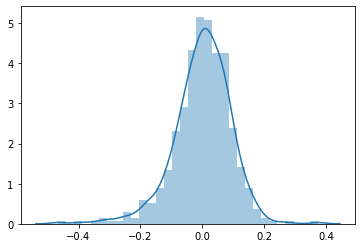

In [362]:
res = y_train - y_train_pred
sns.distplot(res)

# Prediction and evaluation on the test case

In [363]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0.0,1.0,0.0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,0.0,1.0,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0.0,0.0,0.0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0.0,0.0,1.0,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0.0,0.0,0.0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,0,0


In [364]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [365]:
y_test = df_test.pop('cnt')
X_test = df_test

In [366]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,1.0,0.0,1.0,0.0,0.837241,0.778767,0.534223,0.149393,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1.0,0.0,1.0,0.911423,0.855132,0.470417,0.231142,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0.0,0.0,0.0,0.496221,0.492359,0.777843,0.443398,0,0,...,1,0,0,1,0,0,0,0,0,1
221,1.0,0.0,0.0,1.0,0.890387,0.805661,0.236659,0.449707,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0.0,0.0,0.0,0.821739,0.749249,0.070765,0.682387,0,1,...,0,0,0,1,0,0,0,0,0,0


In [367]:
X_test_sm = X_test_sm.drop(['mnth_Mar','mnth_Oct','weekday_thur','mnth_Jun','atemp','weekday_sun','weekday_sat','workingday','mnth_Aug','weekday_wed','mnth_May','hum','mnth_Feb','windspeed'], axis = 1)

## Pridicting y using X_test_sm

In [368]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

# Evaluating r2 score

In [369]:
#evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8196916596859947